# Team ©
- Patrick Molina
- ChihabEddine Zitouni

### Problem to be Solved:
<span style= "color: #5FBFF9">**Semantic Segmentation**</span>

**Descritpion**:
The goal is to assign a class label to each pixel in an image, effectively partitioning the image into meaningful regions.


### Dataset:
[**Visual Object Classes Challenge 2012 (VOC2012)**](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html)

#### Key Features:
1. **Dataset Composition**:
   - **Images**: Contains 11,530 images with a variety of scenes, objects, and backgrounds.
   - **Annotations**: Pixel-wise segmentation masks, bounding boxes, and image-level labels for classification.
   - **Object Classes**: The dataset features 20 object categories, plus a "background" class:
     - *Person*: person
     - *Animals*: bird, cat, cow, dog, horse, sheep
     - *Vehicles*: aeroplane, bicycle, boat, bus, car, motorbike, train
     - *Indoor objects*: bottle, chair, dining table, potted plant, sofa, TV/monitor

2. **Segmentation Masks**:
   - Each image is accompanied by a corresponding segmentation mask.
   - Masks label each pixel as either one of the 20 object classes or the background (class ID: 0).

3. **Example Images**:
- Example 1: Aeroplane:


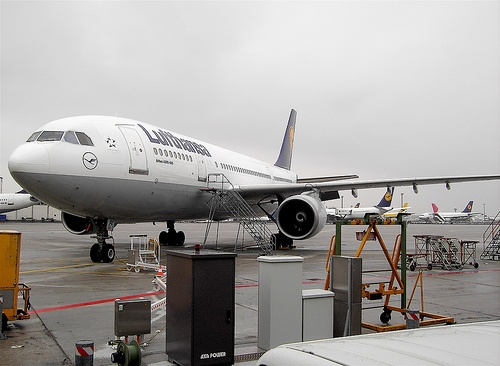
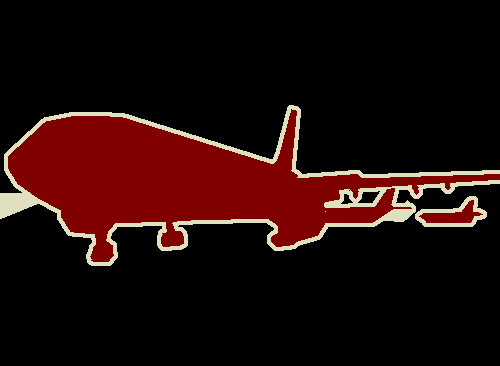

- Example 2: Horse + Person


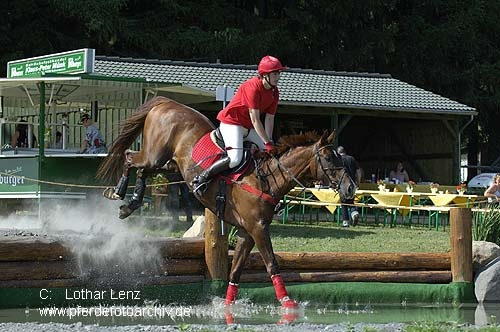
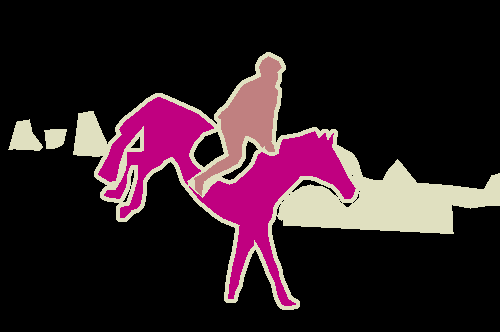

***********

Our contribution to the dataset
- We used Adobe Photoshop as a Lableling Tool to Color the regions in the new pictures:

1. Selecting the Objects


<img src="./3.jpg" alt="Image 1" width="70%" height="70%">


2. Coloring Each Object based on the colormap


<img src="./1.jpg" alt="Image 2" width="70%" height="70%">



3. Putting a black background


<img src="./2.jpg" alt="Image 3" width="70%" height="70%">



## The Model

### Architecture
This model is based on Attention U-Net with a ResNet-34 encoder for feature extraction. It improve conventional U-Net by incorporating attention gates, which allow the network to focus on the most relevant spatial information during upsampling. 
This makes it particularly effective for tasks requiring precise segmentation, such as medical imaging and defect detection in manufacturing.

- Architecture Details:
1. Encoder (Feature Extractor)
    The encoder follows the first few layers of ResNet-34, which is pre-trained on ImageNet for better feature extraction:

        - Initial convolutional block:

            - 7×7 convolution (Conv2D)
            - Batch Normalization
            - ReLU activation
            - 3×3 max pooling

        - Residual Blocks:
            - Layer1: 3 residual blocks (64 filters)
            - Layer2: 4 residual blocks (128 filters)
            - Layer3: 6 residual blocks (256 filters)
            - Layer4: 3 residual blocks (512 filters)

        
    Each layer progressively extracts spatial and contextual features from the input image, reducing resolution while increasing depth.

    Dropout (0.3) is applied to prevent overfitting.



2. Decoder with Attention Mechanism
    The decoder reconstructs the segmented output using:

        - Transpose Convolutions for upsampling, doubling the spatial resolution at each step.
        - Attention Gates to filter relevant spatial information before concatenating encoder features.
        - Skip Connections between corresponding encoder and decoder levels, preserving fine-grained spatial details.
        - DoubleConvolution Blocks (Conv → BatchNorm → ReLU) for refinement.

    Each decoding step follows this structure:
        - Upsampling (ConvTranspose2D) → Attention Gate (processes encoder feature map) → Concatenation of encoder & decoder features → DoubleConv for feature refinement.
        - The inclusion of attention gates ensures that only the most relevant features from the encoder are passed forward, improving segmentation accuracy.

3. Output Layer:

        - The final layer uses a 1×1 convolution to produce an output with the required number of segmentation classes.
        - A bilinear upsampling step ensures the final segmentation map matches the input resolution.
        - The model outputs a probability map for each pixel, determining class assignments.

#### Diagram for layers

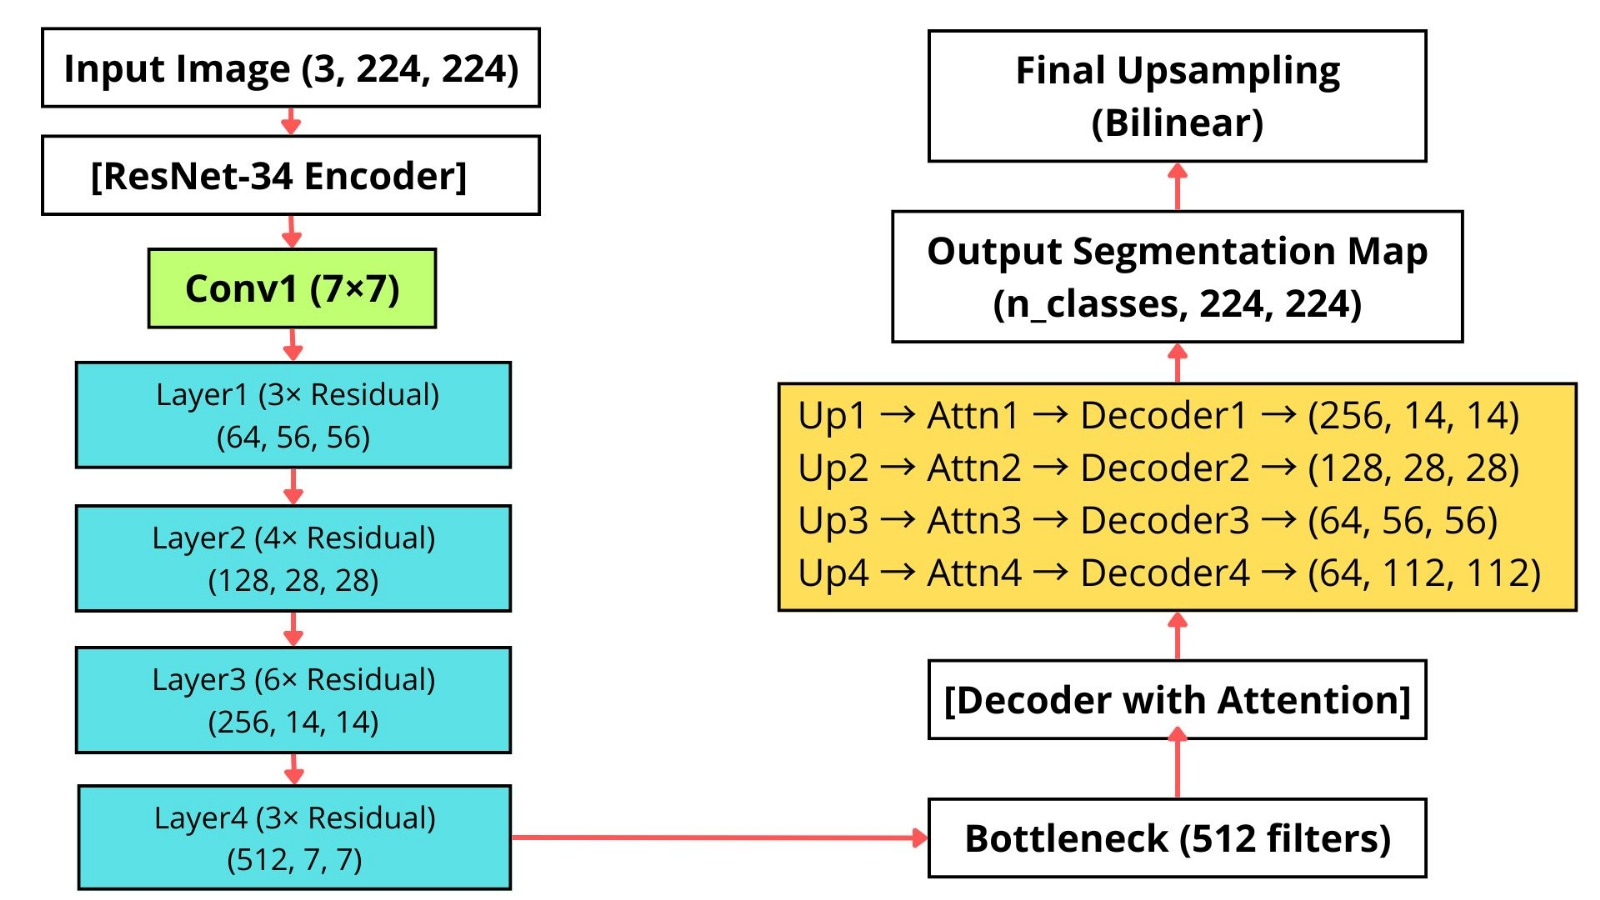

### Analysis

In [3]:
import torch
from torchsummary import summary
from ptils import CustomUNet

# Define the model (assuming CustomUNet is already implemented)
model = CustomUNet(n_classes=21)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Get summary for an input size of (3, 224, 224)
summary(model, input_size=(3,224,224))

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

## Training


### How to Run it
All the training phase will be found on the <span style= "color : #CF5C36">_**training.ipynb**_</span> file

### Metrics used
- Accuracy (acc):
    - Description: Measures the ratio of correctly predicted instances to the total instances.
    - Usage in Code: acc, miou = compute_metrics(seg_output, labels) — The compute_metrics function calculates accuracy.




- Mean Intersection over Union (mIoU, miou):
    - Description: A common metric for evaluating segmentation models. It measures the overlap between the predicted segmentation and the ground truth.
    - Usage in Code: acc, miou = compute_metrics(seg_output, labels) — The compute_metrics function calculates the mean intersection over union.




- Loss (loss):

    - Description: Measures the difference between the predicted output and the actual labels.
    - The loss function used in the code is likely Cross-Entropy Loss, but other possible loss functions for segmentation tasks could include:
        - DiceLoss: Measures the overlap between the predicted segmentation and the ground truth.
        - FocalLoss: Addresses class imbalance by focusing more on hard-to-classify examples.
    - Usage in Code: loss = criterion(seg_output, labels) — The criterion function calculates the loss between the model's output and the ground truth labels.

- Evaluation

The model is evaluated on the validation set. Metrics such as accuracy and mean IoU are logged to monitor the model's performance. TensorBoard is used to visualize the training process. The learning rate is adjusted based on the validation loss to fine-tune the model's performance.

### Plots (From tensorboard)


#### Train and Val Accuracy


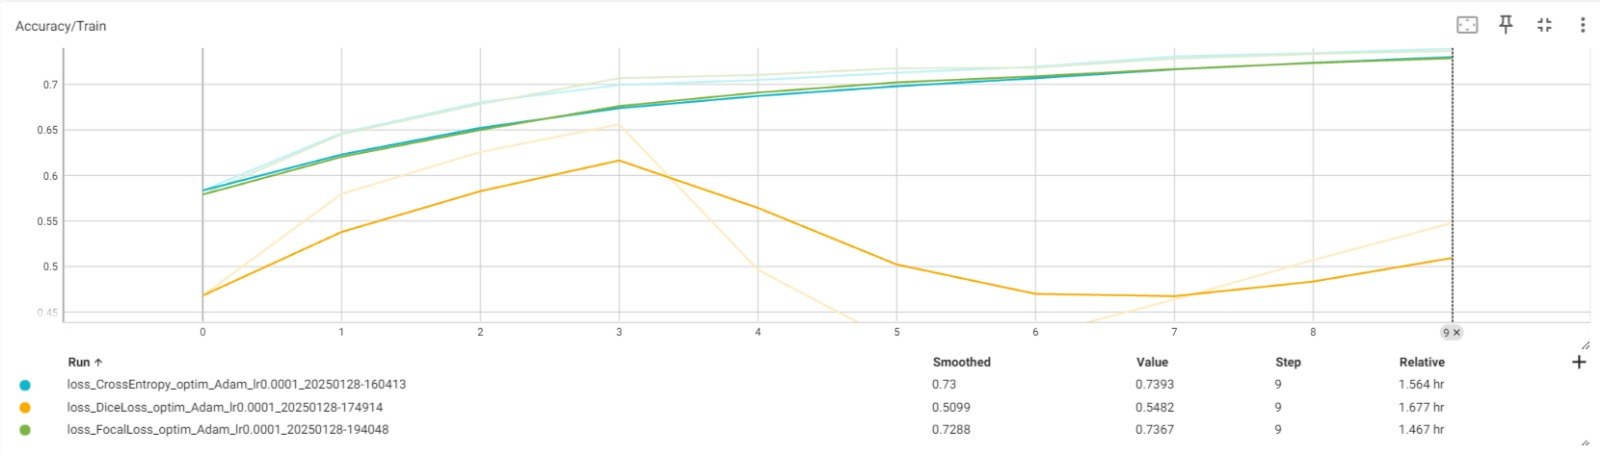


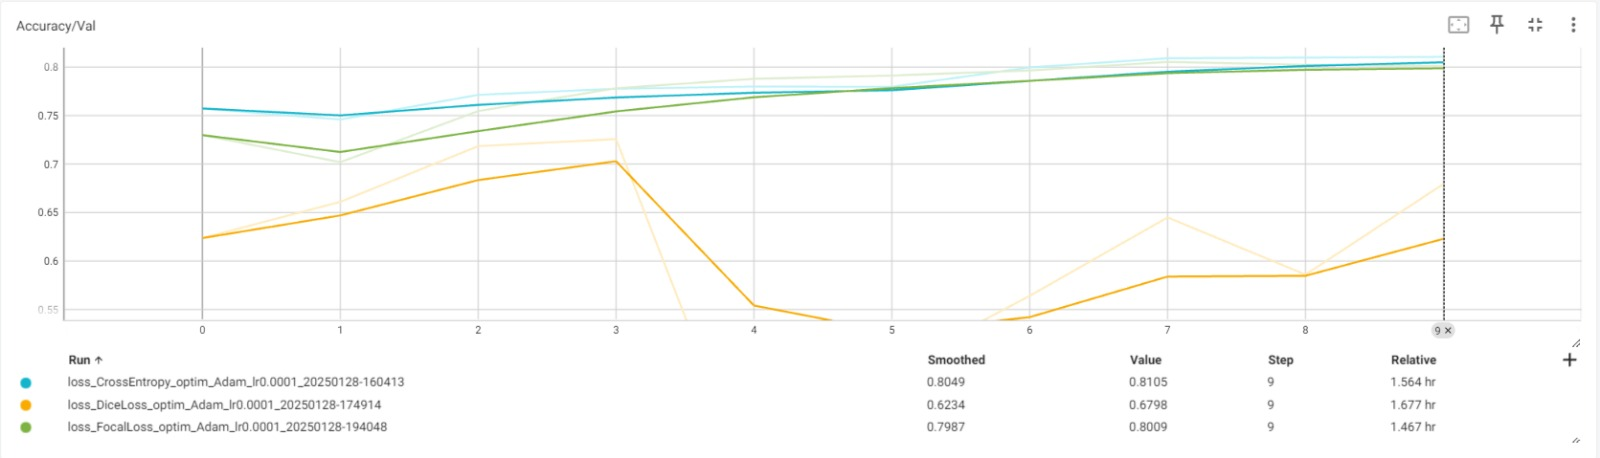


#### Train and Val Loss
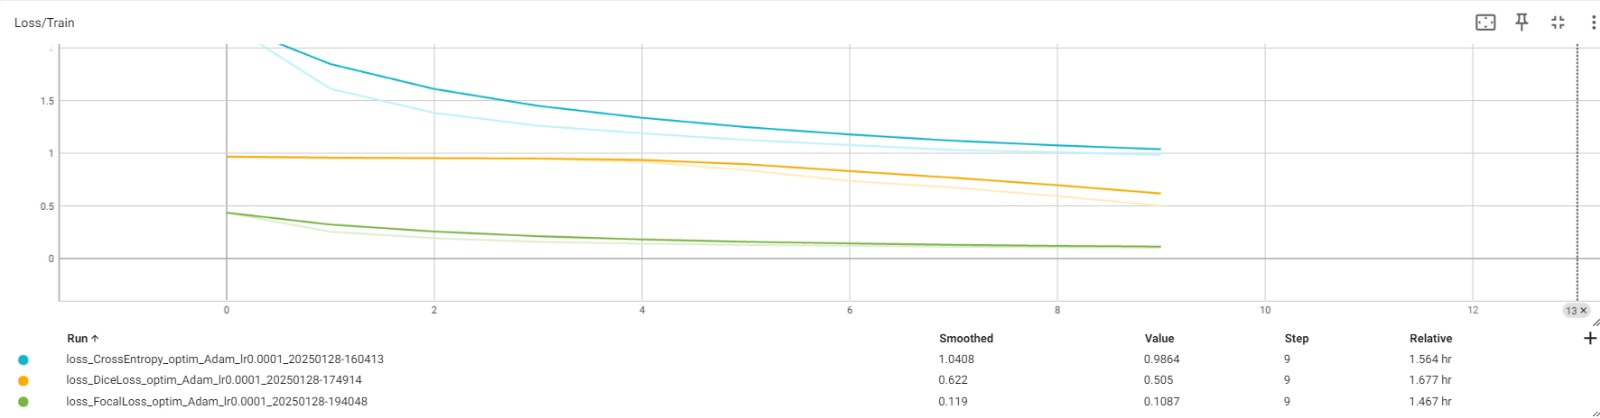


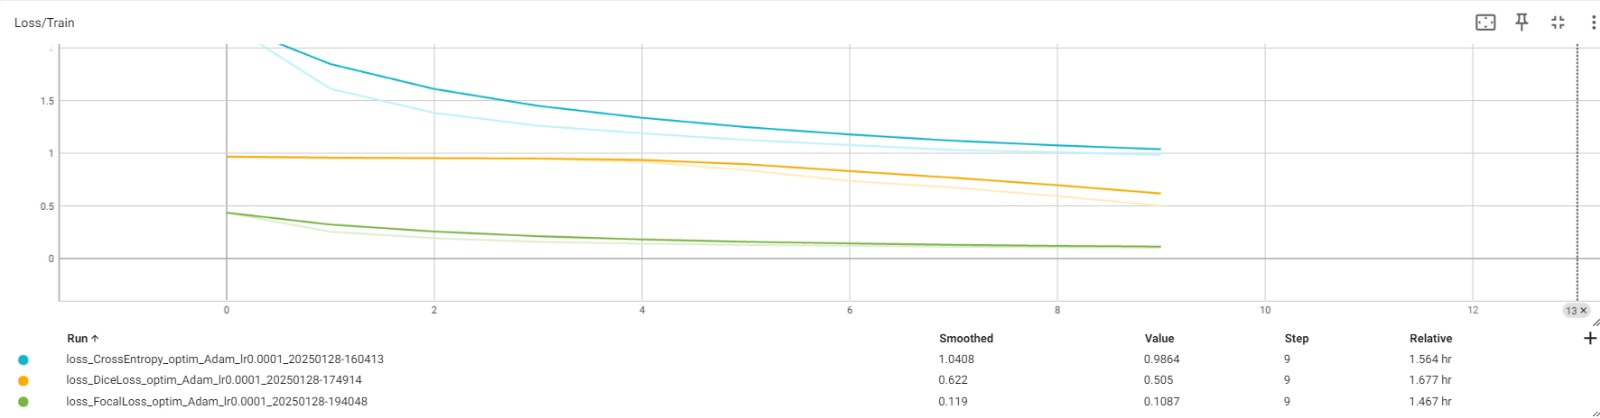


#### MIOU
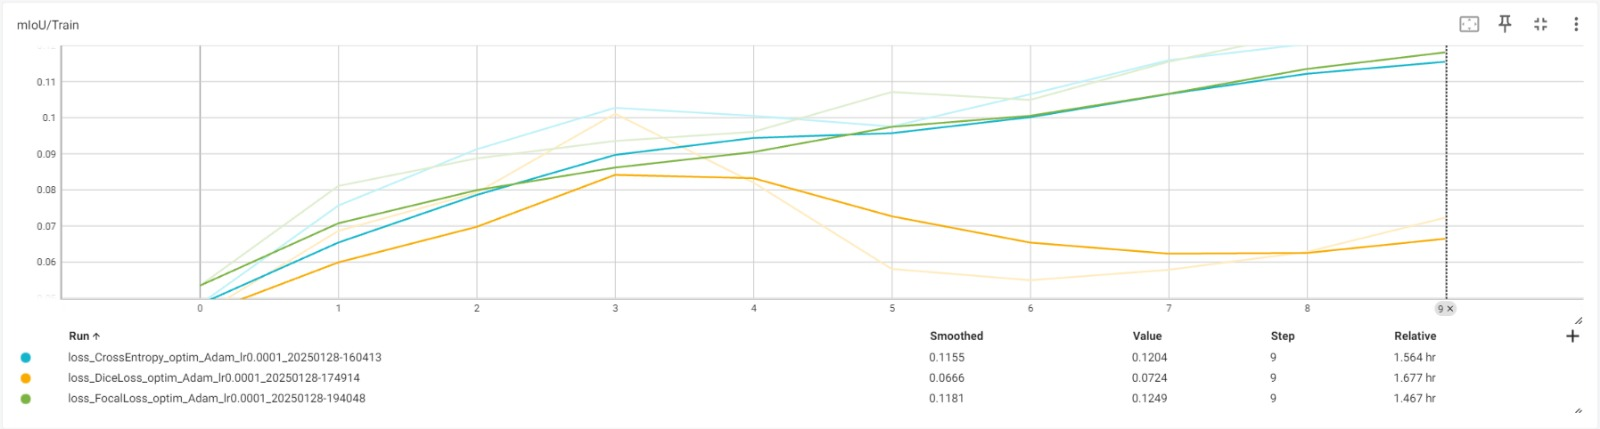


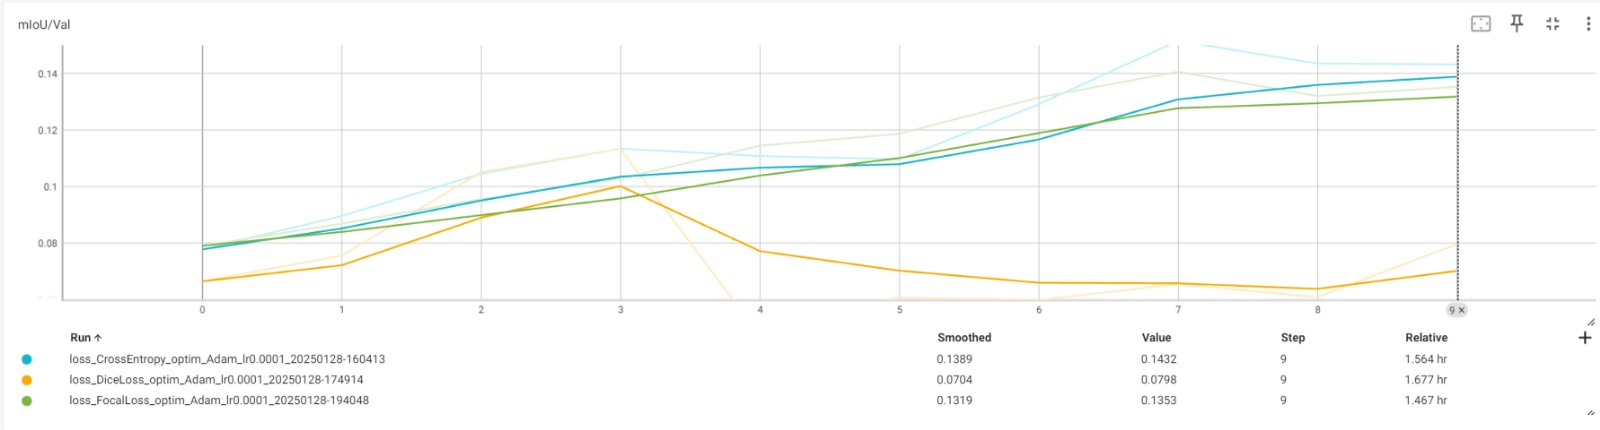




### Used HyperParameters
- Learning Rate: 0.001 for balanced convergence speed and precision.
- Batch Size: 8 for a balance between computational efficiency and gradient accuracy.
- Number of Epochs: 10 to ensure sufficient training without overfitting.
- Optimizer: Adam for adaptive learning rates and faster convergence.
- Learning Rate Scheduler: ReduceLROnPlateau to adjust learning rate based on validation loss.
- Loss Functions: DiceLoss and FocalLoss to handle class imbalance and improve segmentation performance.

### Results

<img src="./results.png" alt="Image 2" width="70%" height="70%">

## Used Libraries

All the training phase will be found on the <span style= "color : #CF5C36">_**requirements.txt**_</span> file

## Runtime Environment

- Laptop with:
    - CPU: AMD Ryzen 7 5800H with Radeon Graphics
    - RAM: 16GB
    - No GPU
    - Windows 11
    - VS Code

## Training and inference time

More than 300 minutes to train:


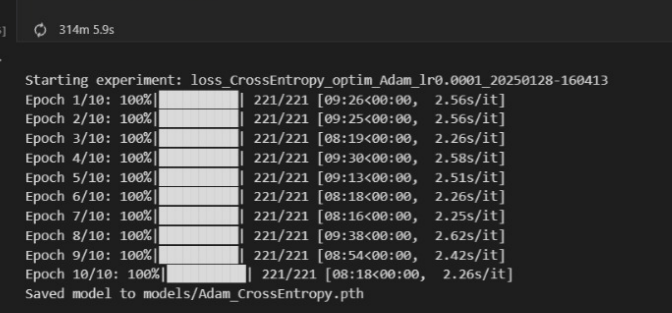

## Bibiography

- [**Visual Object Classes Challenge 2012 (VOC2012)**](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html)
- **https://neptune.ai/blog/image-segmentation**

## Achieved Points

#### Problem:
- Semantic Segmentation, <span style = "color: #5FBFF9">**1pt**</span>

#### Model: 
- pre-trained model on the different problem (transfer-learning), <span style = "color: #5FBFF9">**1pt**</span>
- own architecture (over 50% of own layers), <span style = "color: #5FBFF9">**2pt**</span>


- Additional points:
    - One non trivial solution, <span style = "color: #5FBFF9">**1pt**</span>

#### Dataset:
- No Extra points

#### Training:
Additional points:
- Data augmentation, <span style = "color: #5FBFF9">**1pt**</span>
- Testing various loss functions, <span style = "color: #5FBFF9">**1pt**</span>
- Hyperparameter tuning or estimation, <span style = "color: #5FBFF9">**1pt**</span>


#### Tools:
- Tensorboard <span style = "color: #5FBFF9">**1pt**</span>
- GUI, <span style = "color: #5FBFF9">**1pt**</span>
- Labeling (Photoshop) <span style = "color: #5FBFF9">**1pt**</span>

### Total : 11 points

### **Link to Repository**
https://github.com/patrickmolina1/Computer-Vision---Project-3